In [1]:
%matplotlib inline
import sys
sys.path.insert(0, '../')
from skimage.io import imread
import tensorflow as tf
import utils as utils
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.transform import resize
import layers as layers
## For bug fix
import importlib
importlib.reload(utils)
importlib.reload(layers)

<module 'layers' from '..\\layers.py'>

In [2]:
SHAPE_LOW = (64, 64)
SHAPE_HIGH = (256, 256)

In [3]:
list_images_low = np.array([np.ones(SHAPE_LOW)*scalar for scalar in np.linspace(0.0, 1.0, 4)]).reshape(SHAPE_LOW+(4,))

In [4]:
images_low = np.transpose(np.array([np.ones(SHAPE_LOW)*scalar for scalar in np.linspace(0.0, 0.9, 4)]), [1, 2, 0])
images_low = images_low.reshape((1,) + SHAPE_LOW + (4,))

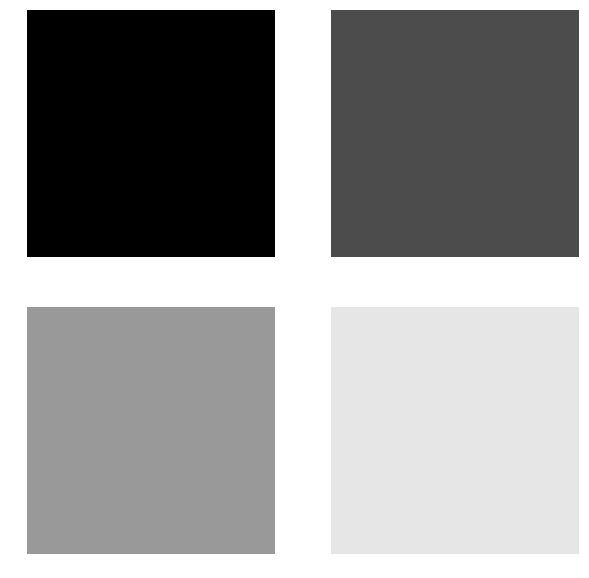

In [5]:
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.axis('off')
    plt.imshow(images_low[0, :, :, i], cmap='gray', vmin=0, vmax=1)

In [6]:
t_image = tf.constant(images_low, dtype=tf.float32)
x = layers.subpixel(t_image, 2, 'subpixel_shuffle')

In [7]:
sess = tf.InteractiveSession()
out = sess.run(x)

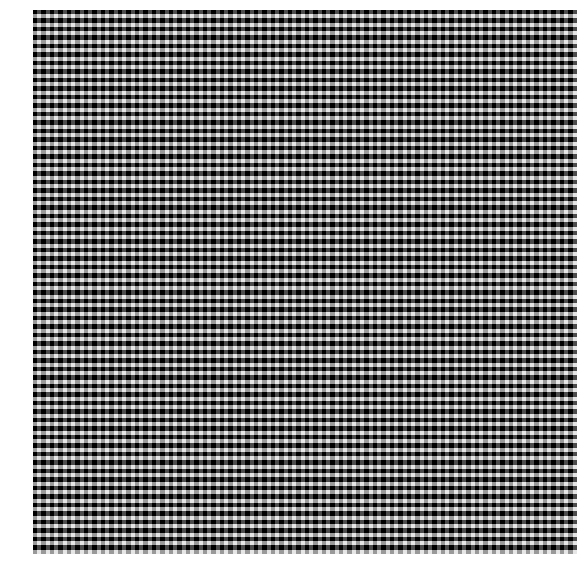

In [8]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(out.squeeze(), cmap='gray', vmin=0.0, vmax=1.0)